Objective: play with scatter plots and plot time series variation

In [4]:
%pylab inline
import os
import time
import glob
import operator
import xarray as xr
import numpy as np
import math
import itertools
import summa_plot as sp
import pysumma.Simulation
import scipy.stats
import matplotlib as plt
from pprint import pprint
from functools import reduce
from scipy.special import psi, inv_boxcox
from jupyterthemes import jtplot
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import importlib
from jupyterthemes import jtplot
importlib.reload(pysumma.Simulation)

jtplot.style('grade3', fscale=1.3)
jtplot.figsize(x=18, y=10)
mpl.rcParams['figure.figsize'] = (18, 10)

MM_PER_M = 1000
SEC_PER_MIN = 60
MIN_PER_HOUR = 60
HOUR_PER_DAY = 24
DAY_PER_YEAR = 365
# Timestep is 1 hour in our case
SEC_PER_TIMESTEP = SEC_PER_MIN * MIN_PER_HOUR

user = os.environ['USER']
sites = ['Amplero', 'Blodgett', 'Bugac', 'ElSaler', 'ElSaler2', 'Espirra', 'FortPeck', 
         'Harvard', 'Hesse', 'Howard', 'Howlandm', 'Hyytiala', 'Kruger', 'Loobos', 'Merbleue',
         'Mopane', 'Palang', 'Sylvania', 'Tumba', 'UniMich']
soil_moisture_sites = ['Amplero', 'Blodgett', 'ElSaler', 'ElSaler2', 'FortPeck', 'Hesse', 
                       'Hyytiala', 'Loobos', 'Mopane', 'Sylvania']
fman_template = "/pool0/data/"+user+"/PLUMBER_data/sites/{}/settings/summa_zFileManager_{}.txt"
oc_template = "/pool0/data/"+user+"/PLUMBER_data/sites/{}/settings/meta/summa_zModelOutput.txt"
fman_dict = {s: fman_template.format(s, s) for s in sites}

wb_vars = ['pptrate', 'scalarGroundEvaporation', 'scalarCanopyEvaporation',
           'scalarSnowSublimation', 'scalarCanopySublimation', 'scalarTotalRunoff', 
           'scalarSWE', 'scalarTotalSoilLiq',  'scalarTotalSoilIce', 
           'scalarCanopyIce', 'scalarCanopyLiq', 'scalarCanopyTranspiration', 
           'scalarLatHeatTotal', 'scalarSenHeatTotal', 'airtemp', 'SWRadAtm']

wb_dict = {
    'precip': ['pptrate'],
    'evap': ['scalarGroundEvaporation', 'scalarCanopyEvaporation', 'scalarCanopyTranspiration', 
             'scalarSnowSublimation', 'scalarCanopySublimation'],
    'runoff': ['scalarTotalRunoff'],
    'swe': ['scalarSWE'],
    'soil_moisture': ['scalarTotalSoilLiq', 'scalarTotalSoilIce'],
    'canopy_moisture': ['scalarCanopyIce', 'scalarCanopyLiq'],
    'latent_heat': ['scalarLatHeatTotal'],
    'sensible_heat': ['scalarSenHeatTotal'],
    'temperature': ['airtemp'],
    'shortwave': ['SWRadAtm']
}

wb_multiplier = {
    'precip': SEC_PER_TIMESTEP,
    'evap': SEC_PER_TIMESTEP,
    'runoff': SEC_PER_TIMESTEP * MM_PER_M,
    'swe': 1,
    'soil_moisture': 1,
    'canopy_moisture': 1,
    'latent_heat': -1,
    'sensible_heat': -1,
    'temperature': 1,
    'shortwave': 1
}

Populating the interactive namespace from numpy and matplotlib


/pool0/home/tushark/miniconda3/envs/default/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
out_files = []
for site in soil_moisture_sites:
    out_files += glob.glob('/pool0/data/tushark/PLUMBER_data/sites/' + site + '/summa_output/*output*.nc', recursive=True)

In [8]:
out_files[56:64]

['/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_logBelowCanopy_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_logBelowCanopy_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_exponential_Jarvis_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_exponential_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_logBelowCanopy_Jarvis_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_logBelowCanopy_Jarvis_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_exponential_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_exponential_Jarvis_timestep.nc']

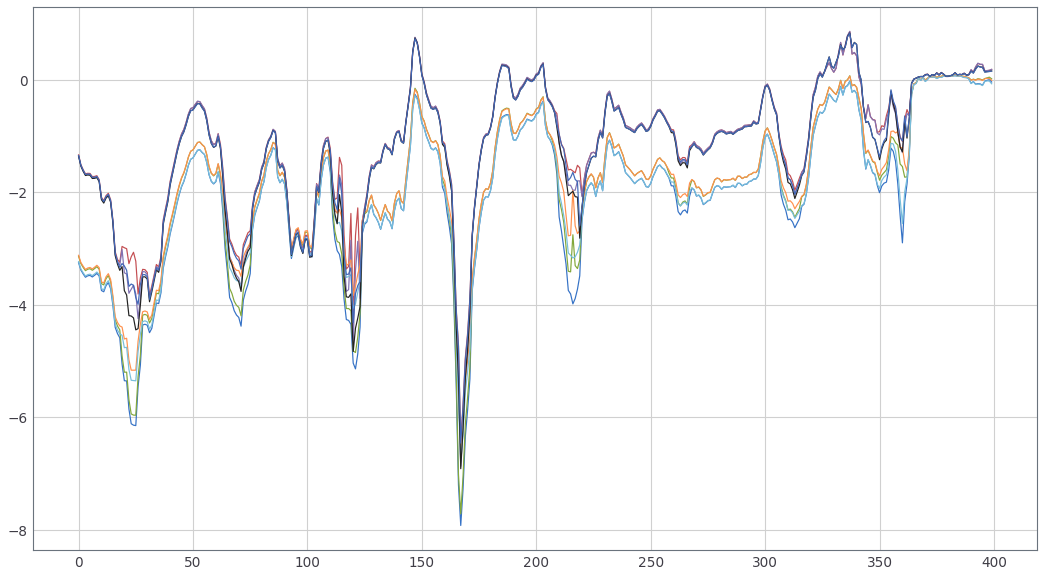

In [5]:
for file in out_files[56:64]:
    output = xr.open_dataset(file)
    plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 500)))

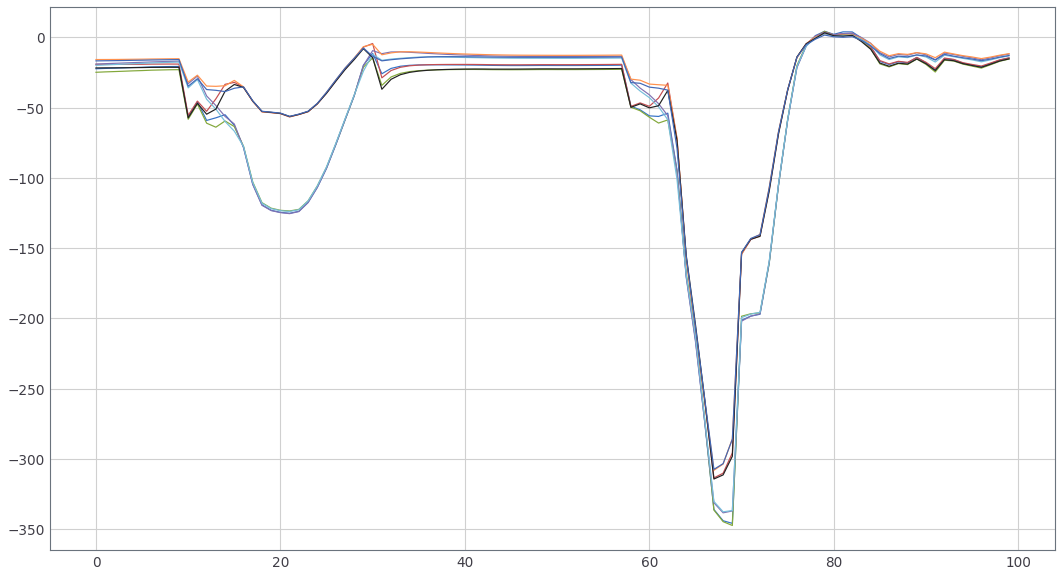

In [47]:
for file in out_files[16:24]:
    output = xr.open_dataset(file)
    plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 200)))

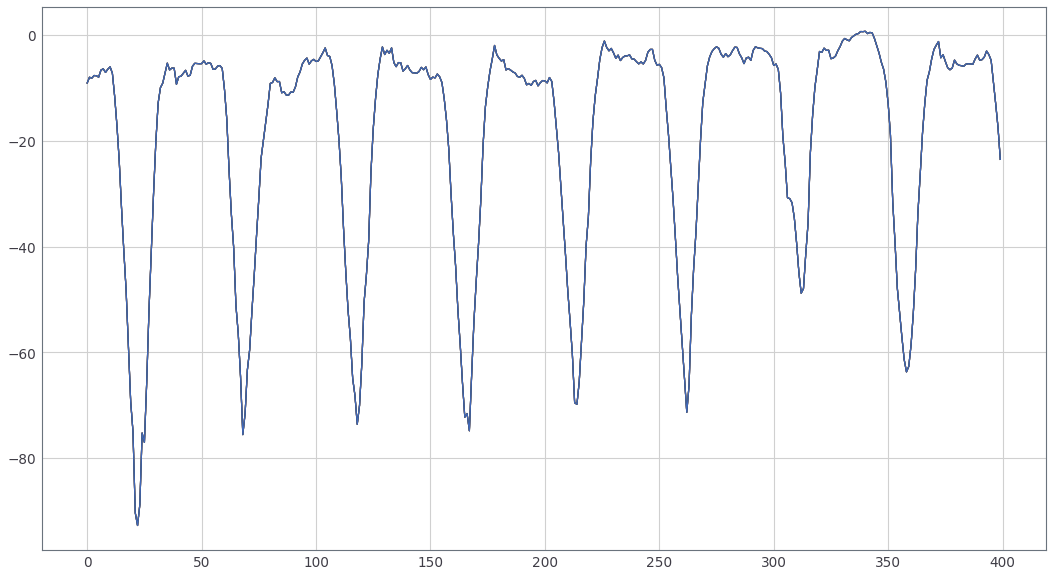

In [33]:
for file in out_files[24:32]:
    output = xr.open_dataset(file)
    plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 500)))

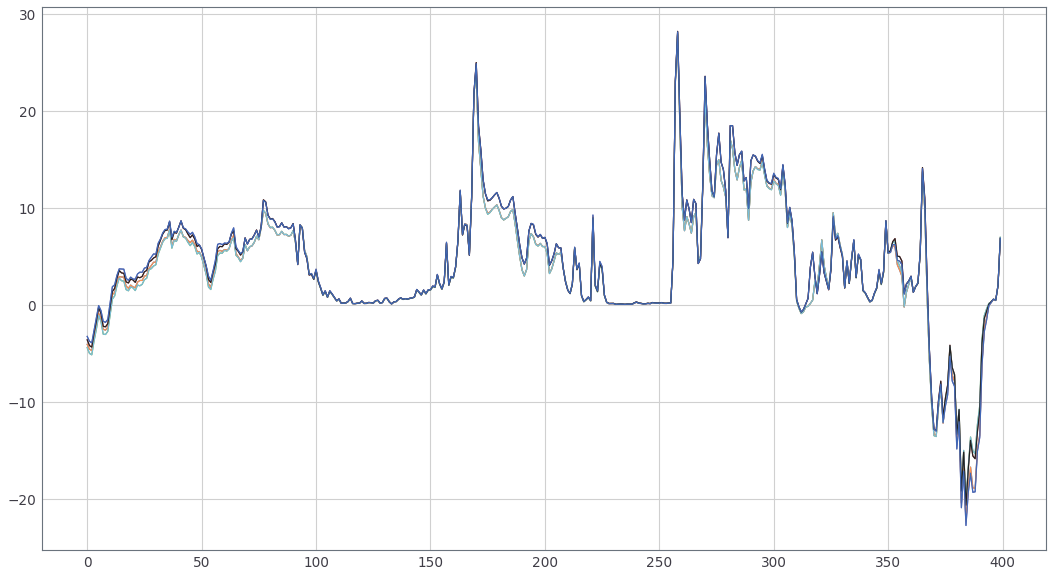

In [39]:
for file in out_files[48:56]:
    output = xr.open_dataset(file)
    plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(, 500)))

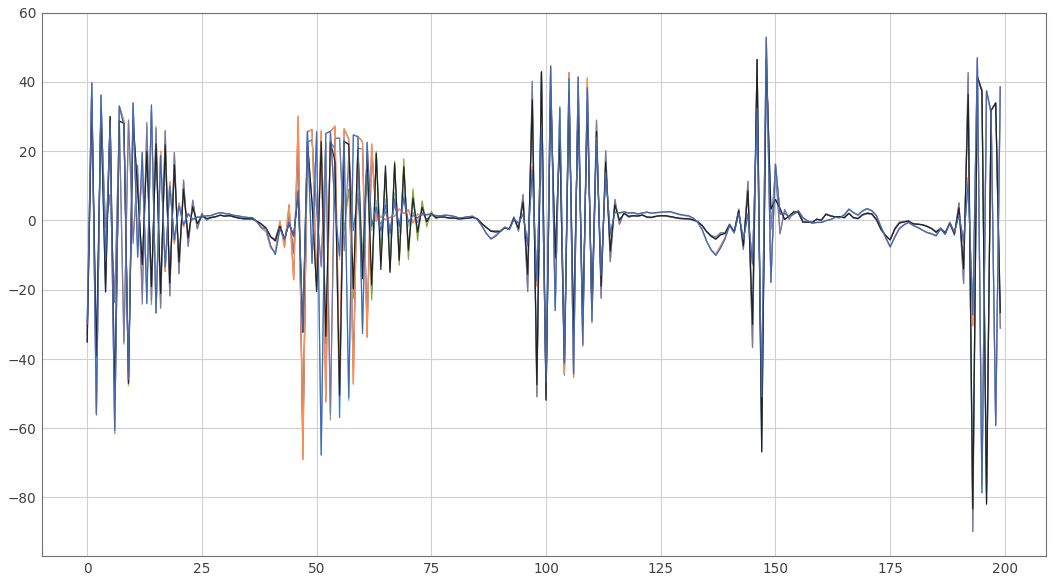

In [106]:
for file in out_files[64:72]:
    output = xr.open_dataset(file)
    plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(3000, 3200)))

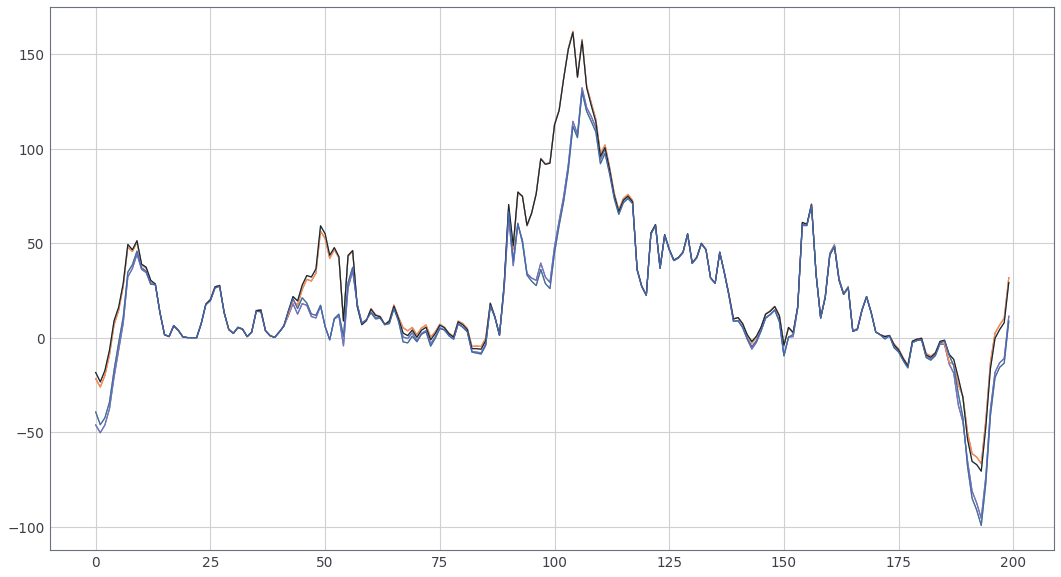

In [107]:
for file in out_files[32:40]:
    output = xr.open_dataset(file)
    plt.pyplot.plot(output['scalarSenHeatTotal'].isel(time=slice(3000, 3200)))

In [9]:
output['scalarLatHeatTotal']

<xarray.DataArray 'scalarLatHeatTotal' (time: 175296, hru: 1)>
[175296 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01T00:30:00.000013408 ...
  * hru      (hru) int32 1
Attributes:
    long_name:  latent heat from the canopy air space to the atmosphere (inst...
    units:      W m-2

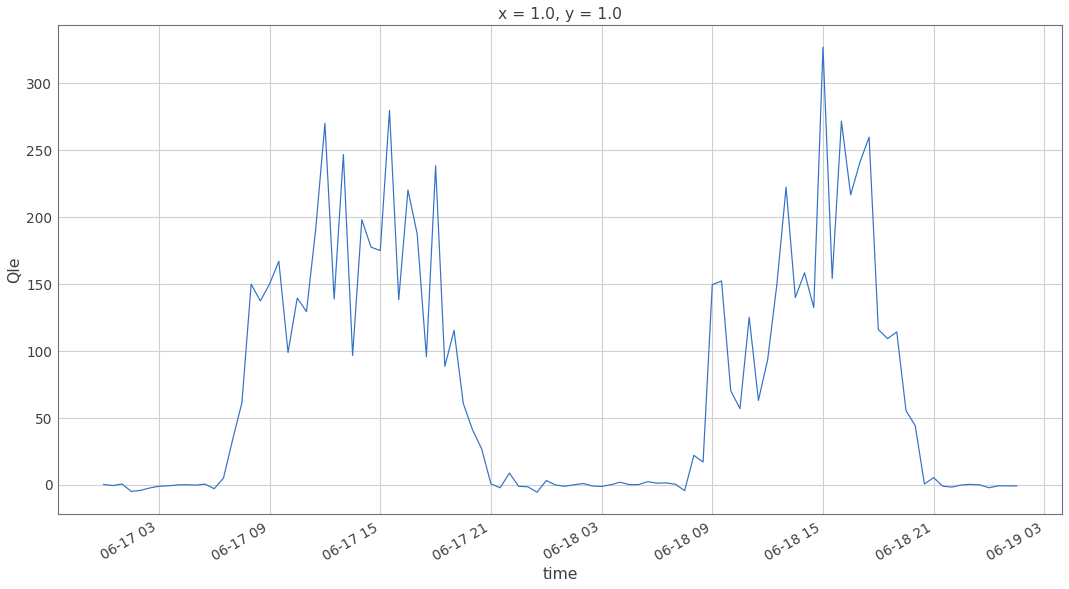

In [23]:
loobos_obs_path = '/pool0/data/andrbenn/PLUMBER_data/sites/Loobos/observations/fluxes/LoobosFluxnet.1.4_flux.nc'.format(site, site)
obs = xr.open_dataset(loobos_obs_path)
obs['Qle'].isel(time=slice(8015, 8115)).plot()

In [8]:
out_files[56:64]

['/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_logBelowCanopy_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_logBelowCanopy_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_exponential_Jarvis_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_exponential_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_difTrans_logBelowCanopy_Jarvis_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_logBelowCanopy_Jarvis_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_exponential_BallBerry_timestep.nc',
 '/pool0/data/tushark/PLUMBER_data/sites/Loobos/summa_output/Loobos_output_simplExp_exponential_Jarvis_timestep.nc']

(array([ -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 10 Text yticklabel objects>)

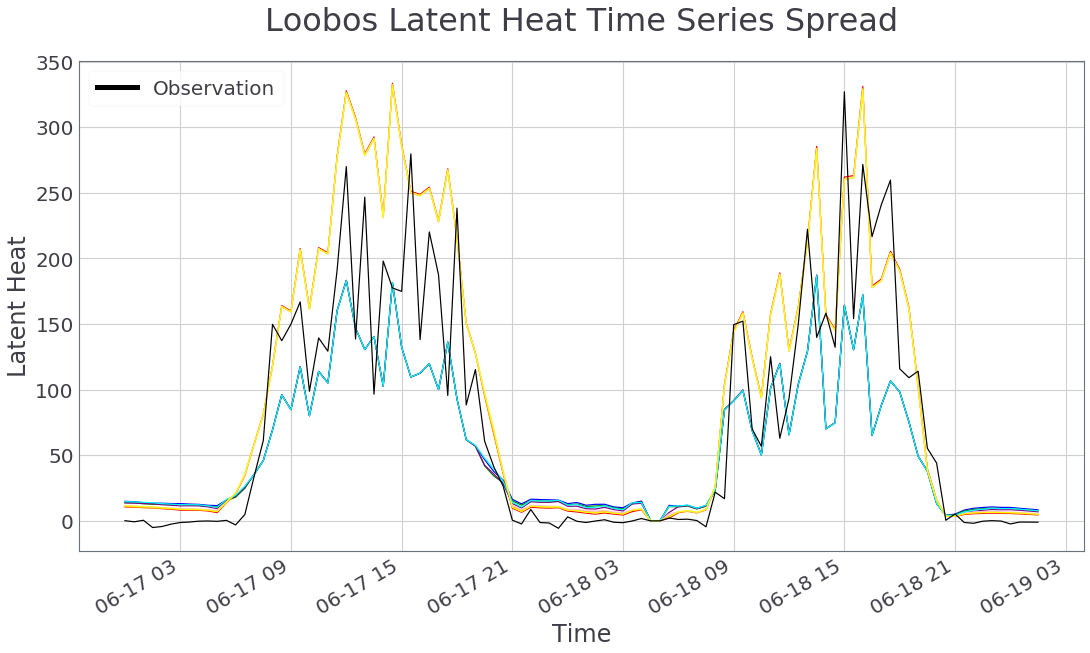

In [46]:
import matplotlib.lines as mlines
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'yellow']
#label_list = ['Ball-Berry']
options = []

i = 0
fig = plt.pyplot.figure()
for file in out_files[56:64]:
    output = xr.open_dataset(file)
    #plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 500)))
    (-output['scalarLatHeatTotal']).isel(time=slice(8015, 8115)).plot(color=color_list[i])
    i = i + 1
obs['Qle'].isel(time=slice(8015, 8115)).plot(color='black', label = 'observation')
plt.pyplot.title('Loobos Latent Heat Time Series Spread', fontsize = 32, y=1.05)
plt.pyplot.ylabel('Latent Heat', fontsize =24 )
plt.pyplot.xlabel('Time', fontsize = 24)
plt.pyplot.savefig('../data/loobos_lh_spread.png')
obs_marker = mlines.Line2D([], [], linewidth=5, color='black',
                           label='Observation')

plt.pyplot.legend(handles=[obs_marker], loc='upper left', fontsize=20)
fig.savefig('../data/loobos_timeseries.png')
#plt.pyplot.legend()
plt.pyplot.xticks(fontsize=20)
plt.pyplot.yticks(fontsize=20)

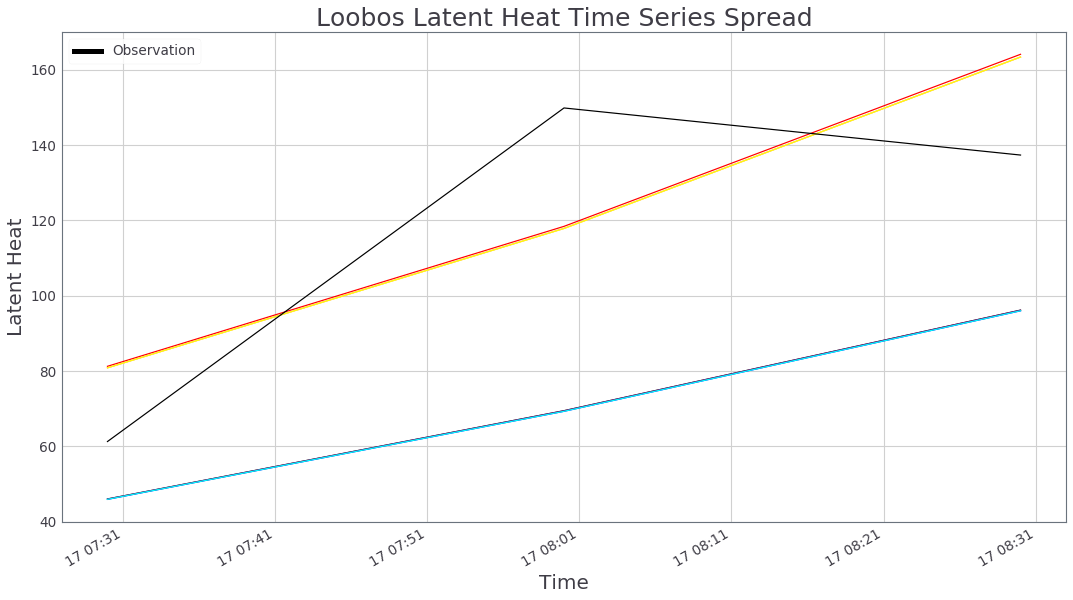

In [42]:
import matplotlib.lines as mlines
color_list = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'yellow']
#label_list = ['Ball-Berry']
options = []

i = 0
fig = plt.pyplot.figure()
for file in out_files[56:64]:
    output = xr.open_dataset(file)
    #plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 500)))
    (-output['scalarLatHeatTotal']).isel(time=slice(8030, 8033)).plot(color=color_list[i])
    i = i + 1
obs['Qle'].isel(time=slice(8030, 8033)).plot(color='black', label = 'observation')
plt.pyplot.title('Loobos Latent Heat Time Series Spread', fontsize = 25)
plt.pyplot.ylabel('Latent Heat', fontsize = 20)
plt.pyplot.xlabel('Time', fontsize = 20)
plt.pyplot.savefig('../data/loobos_lh_spread.png')
obs_marker = mlines.Line2D([], [], linewidth=5, color='black',
                           label='Observation')

plt.pyplot.legend(handles=[obs_marker], loc='upper left')
fig.savefig('../data/loobos_timeseries_zoom.png')
#plt.pyplot.legend()
#plt.pyplot.xticks(fontsize=20)
#plt.pyplot.yticks(fontsize=20)

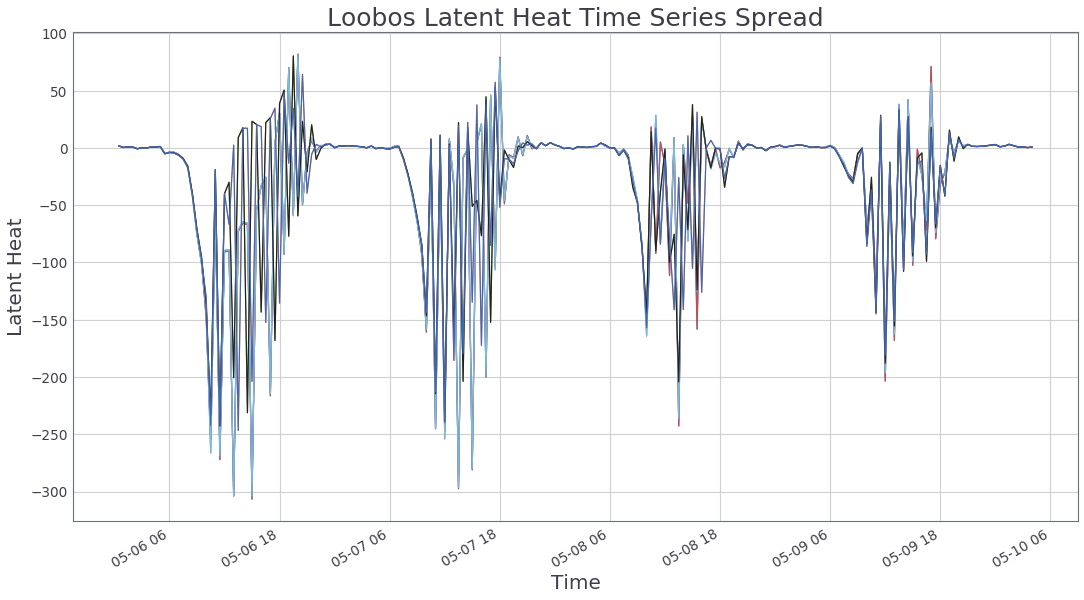

In [105]:
options = []
for file in out_files[:8]:
    output = xr.open_dataset(file)
    #plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 500)))
    output['scalarLatHeatTotal'].isel(time=slice(6000, 6200)).plot()
plt.pyplot.title('Loobos Latent Heat Time Series Spread', fontsize = 25)
plt.pyplot.ylabel('Latent Heat', fontsize = 20)
plt.pyplot.xlabel('Time', fontsize = 20)
plt.pyplot.savefig('../data/loobos_lh_spread.png')
#plt.pyplot.xticks(fontsize=20)
#plt.pyplot.yticks(fontsize=20)

"observ = xr.open_dataset('/pool0/data/andrbenn/PLUMBER_data/sites/Loobos/observations/fluxes/LoobosFluxnet.1.4_flux.nc')\nplt.pyplot.plot(observ['Qle'][1], color='yellow')"

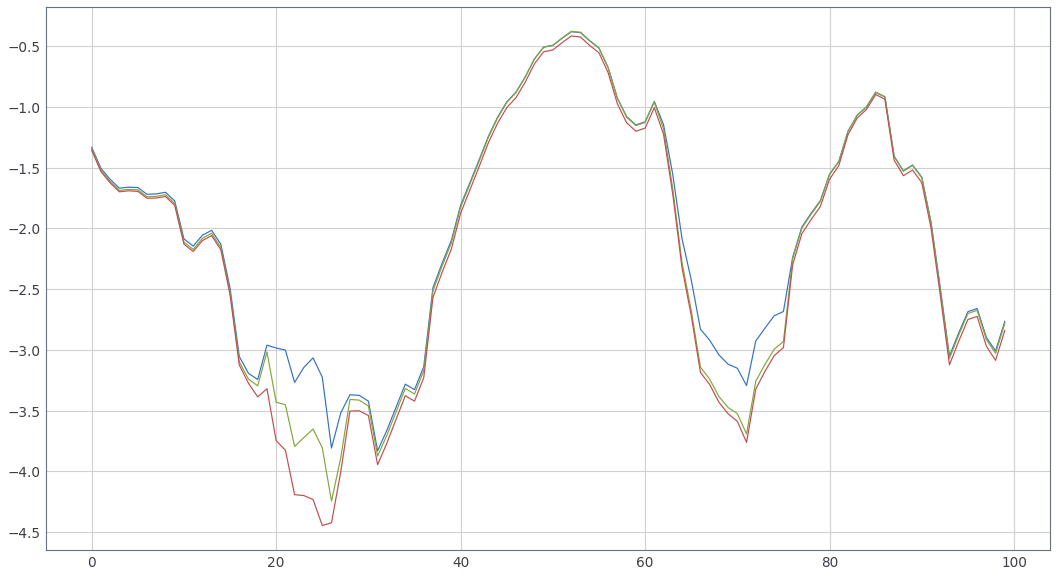

In [75]:
options = [58, 59, 62]
for i in options:
    output = xr.open_dataset(out_files[i])
    plt.pyplot.plot(output['scalarLatHeatTotal'].isel(time=slice(100, 200)))
'''observ = xr.open_dataset('/pool0/data/andrbenn/PLUMBER_data/sites/Loobos/observations/fluxes/LoobosFluxnet.1.4_flux.nc')
plt.pyplot.plot(observ['Qle'][1], color='yellow')'''

In [74]:
observ['Qle']

<xarray.DataArray 'Qle' (time: 175296, y: 1, x: 1)>
[175296 values with dtype=float64]
Coordinates:
  * x        (x) float64 1.0
  * y        (y) float64 1.0
  * time     (time) datetime64[ns] 1997-01-01T00:30:00 1997-01-01T01:00:00 ...
Attributes:
    units:      W/m^2
    long_name:  Latent heat flux from surface
    CF_name:    surface_upward_latent_heat_flux